# Orbitrap Data Analysis Code
#### Developer: ssz; Last modified: July 8, 2020

In [14]:
import DataAnalyzerWithPeakInteg

### Load the analysis code

In [15]:

#(1) Data Folder: Specify what folder contains the files to be analyzed
inputStandardFolder = "/Users/sarahzeichner/Documents/Caltech/Research/Direct Injection/DirectInjectionData/022021_pxylene/80-120/test"

#####################################################################

#(2) Experimental parameters
#(2a) Specify the order of isotopes as extracted from FT statistic
#isotopeList = ['UnSub','13C']
isotopeList = ['UnSub', '13C']
#isotopeList = ['UnSub', '2x13C']

#(2b) Specify the time frame of each eluted peak
#peakTimeFrames = [(6.65,6.78),(7.85, 8.12), (10,10.12),(12.37,12.56)] #sample mixture
#peakTimeFrames = [(6.65,6.78),(7.85, 8.12), (10,10.12), (10.21, 10.4),(12.37,12.56)] #standard mixture
#peakTimeFrames = [(11.37, 11.60), (11.37, 11.60), (11.37, 11.60), (11.37, 11.60)] #aspartic labels
#peakTimeFrames = [(14.05,14.65), (14.05,14.65), (14.05,14.65)] #serine fragments, from elise SERC
#peakTimeFrames = [(6.65,6.78)] #alanine, std mixture
#peakTimeFrames = [(10,10.12),(10,10.12),(10,10.12),(10,10.12),(10,10.12),(10,10.12),(10,10.12)] #aspartic
#peakTimeFrames = [(12.37,12.56),(12.37,12.56),(12.37,12.56),(12.37,12.56),(12.37,12.56), (12.37,12.56), (12.37,12.56), (12.37,12.56), (12.37,12.56)] #methionine
#peakTimeFrames = [(5.50, 7.70),(5.50, 7.70),(5.50, 7.70),(5.50, 7.70)] #Chimiak dallas alanine, all peaks--> note the long time frame
#peakTimeFrames = [(32.80, 33.50)] #fluoranthene large window
#peakTimeFrames = [(34.36, 35.12), (34.36, 35.12), (34.36, 35.12)] #pyrene large windowxylene
#peakTimeFrames = [(32.65, 33.35), (32.65, 33.35), (32.65, 33.35)] #fluoranthene large window
#peakTimeFrames = [(34.15, 34.80), (34.15, 34.80), (34.15, 34.80)] #pyrene large window
peakTimeFrames = [(8.54, 8.86), (8.54, 8.86)] #p-xylene
#peakTimeFrames = [(8.54, 8.86)] #p-xylene
#peakTimeFrames = [(4.56, 6.7)] #chimiak dallas alanine, 184 and 140 peaks

#(2c)Specify any ratios to omit
#omitRatios = ['15N/13C', '13C/15N'] #for nitrogen data
#omitRatios = ['13C/D',  'D/13C']
omitRatios = []

#####################################################################
#(3) Set toggles for data analysis

dataCullThreshhold = None #default = None; a target variable, like 'tic', or 'TIC*IT' to use to determine which scans to call. 
cullZeroScansOn = False #True/False
trapRuleOn = False #True/False, when False, the code integrates by adding counts over a peak and then taking the ratio with the unsubstitutde
baselineSubstractionOn = True #True/False, when False, no baseline correction is applied to NL scores
gc_elution_on = True #True/False, when False, all scans are taken to calculate ratios
cullingThreshholdPercentMaxUnsubNLPeak = 0.10 #Threshhold to cull only above a threshhold for the values where NL/maxUnSub(NL)<threshhold

#####################################################################
 
#(4) Perform the data analysis and return the output! (Output is also exported to CSV in the underlying code, to the inputFolder path)
Output, StatsOutput = DataAnalyzerWithPeakInteg.calc_Folder_Output(inputStandardFolder, cullOn=dataCullThreshhold, cullAmount=2,\
                                                                    cullZeroScansOn=cullZeroScansOn, trapRuleOn = trapRuleOn, \
                                                                    baselineSubstractionOn=True, gcElutionOn=gc_elution_on, \
                                                                    gcElutionTimes = peakTimeFrames, isotopeList = isotopeList, \
                                                                    minNL_over_maxNL=cullingThreshholdPercentMaxUnsubNLPeak, \
                                                                    omitRatios = omitRatios, fileCsvOutputPath=None)

/Users/sarahzeichner/Documents/Caltech/Research/Direct Injection/DirectInjectionData/022021_pxylene/80-120/test/02172021_pxylene_newMethod_80_120_1ul_01.xlsx


KeyboardInterrupt: 

### Process a folder of data

Print output for all files, fragments, and isotope ratios

In [ ]:
Output

Print statistical summary

In [ ]:
StatsOutput

### Analyze one specific raw file

Define the input file and the list of isotopes you extracted in order, as they were extracted from FTStatistic. 

By default, the code will compute ratio for every combination; here 13C/15N, 13C/UnSub, and 15N/UnSub. If you don't care about some of those (i.e. 13C/15N), you should add that ration and its inverse to omitRatios. In this case, you could write omitRatios = ['13C/15N','15N/13C']. 

In [19]:
#Specific file name to look at
inputStandardFile = "/Users/sarahzeichner/Documents/Caltech/Research/Direct Injection/DirectInjectionData/022021_pxylene/80-120/02172021_pxylene_newMethod_80_120_1ul_01.xlsx"
isotopeList = ['UnSub','13C']
gc_elution_on = True
peakTimeFrames = [(8.54, 8.86), (8.54, 8.86)] #p-xylene
omitRatios = []

dataCullThreshhold = None #default = None; a target variable, like 'tic', or 'TIC*IT' to use to determine which scans to call. 
cullZeroScansOn = False #True/False
trapRuleOn = False #True/False, when False, the code integrates by adding counts over a peak and then taking the ratio with the unsubstitutde
baselineSubstractionOn = True #True/False, when False, no baseline correction is applied to NL scores
gc_elution_on = True #True/False, when False, all scans are taken to calculate ratios
cullingThreshholdPercentMaxUnsubNLPeak = 0.10 #Threshhold to cull only above a threshhold for the values where NL/maxUnSub(NL)<threshhold
cullAmount = 2
cullOn = None

Import the data into a workable form (i.e., The FTStat import has each peak (single line of FTStat input code, i.e. a 13C or 15N peak) as a separate dataframe. This code combines these so that each fragment (where a fragment is a set of peaks, i.e. the 109 fragment as a 13C, 15N, and Unsubstituted peak) has a single dataframe. It then culls scans that fall outside of some threshold, i.e. here with TIC * IT more than three standard deviations from the mean. Note the isotopeList input is the same as defined in input 2; the same isotopeList is used in multiple functions and should be carried through the entire script, so it is easiest to change it once at the start.)

In [21]:
peaks = import_Peaks_From_FTStatFile(inputStandardFile)
pd = convert_To_Pandas_DataFrame(peaks)
Merged = combine_Substituted_Peaks(peakDF=pd,cullOn=cullOn, cullZeroScansOn = cullZeroScansOn, baselineCorrectionOn = baselineSubstractionOn, \
                gc_elution_on=gc_elution_on, gc_elution_times=peakTimeFrames, cullAmount=cullAmount, isotopeList=isotopeList, minNL_over_maxNL=cullingThreshholdPercentMaxUnsubNLPeak)

UnSubtiming: countsUnSub    686
dtype: int64
13Ctiming: counts13C    686
dtype: int64
UnSubtiming: countsUnSub    687
dtype: int64
13Ctiming: counts13C    687
dtype: int64


Analyze data quality related to the AGC system, determining how TIC, IT, and TIC * IT vary with retention time and with each other. 

(Note: not sure how this applies to separate parts of the GC, especially once it is culled for each fragment). 

It also prints the standard deviation of each. 
good <0.05-0.07
ok < 0.10
bad >0.10

**Notes:**
**You can change the df=Merged[x] line in order to look at the data quality of each fragment**

You may want to change to scatter plots; in the ax.plot line, change ax.plot to ax.scatter. 

TIC Mean and STD
2.96e+08
0.61
IT Mean and STD
1.40e+00
1.02
TIC*IT Mean and STD
2.40e+05
0.27


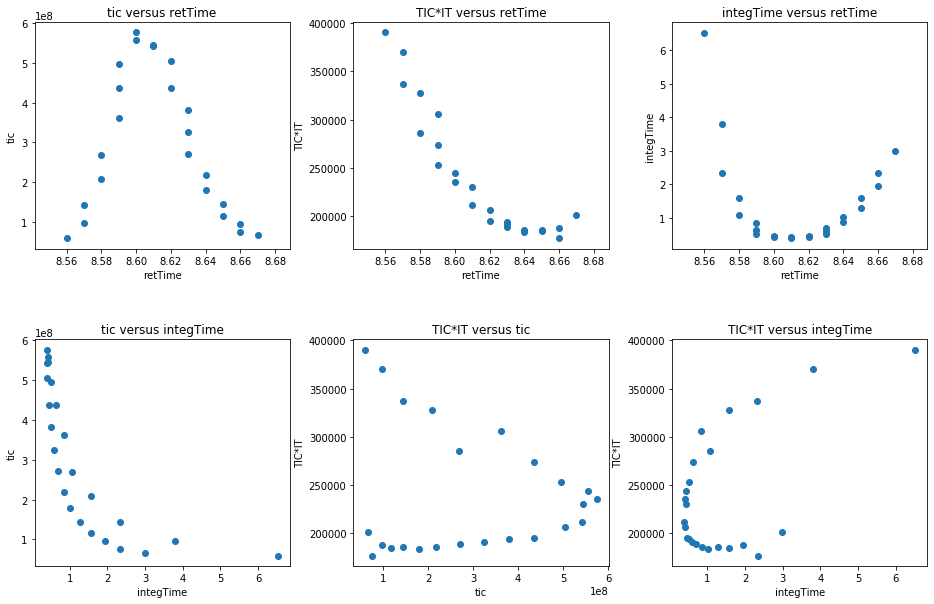

In [22]:
#Intiialize figure
fig = plt.figure(figsize=(16, 10))

#Initializes an outer grid. Sets of subplots for each peak will be placed into this outer grid. 
numberOfPeaks = 5
outer_grid = gridspec.GridSpec(1, 1, wspace=0.5, hspace=0.25)

#What do you want to look at?
df = Merged[0] #change the index to look at the fragment of interest

#The base case gives the tic plots for the whole measurement, then the loop plots each fragment
for i in range(numberOfPeaks):
    if i == 0:
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 3,
            subplot_spec=outer_grid[i], wspace=0.25, hspace=0.40)

        plotlist = [('retTime','tic'),('retTime','TIC*IT'),('retTime','integTime'),('integTime','tic'),('tic','TIC*IT'),('integTime','TIC*IT')]

        for item in plotlist:
            ax = plt.Subplot(fig, inner_grid[plotlist.index(item)])
            ax.scatter(df[item[0]].tolist(),df[item[1]].tolist())
            ax.set_xlabel(item[0])
            ax.set_ylabel(item[1])
            ax.set_title(item[1] + ' versus ' + item[0])
            fig.add_subplot(ax)

    else:
        pass
print('TIC Mean and STD')
print('{:.2e}'.format(df['tic'].mean()))
print(round(df['tic'].std()/df['tic'].mean(),2))
print('IT Mean and STD')
print('{:.2e}'.format(df['integTime'].mean()))
print(round(df['integTime'].std()/df['integTime'].mean(),2))
print('TIC*IT Mean and STD')
print('{:.2e}'.format(df['TIC*IT'].mean()))
print(round(df['TIC*IT'].std()/df['TIC*IT'].mean(),2))


Analyze R values as a function of retention time and the AGC variables (TIC, IT, etc.).

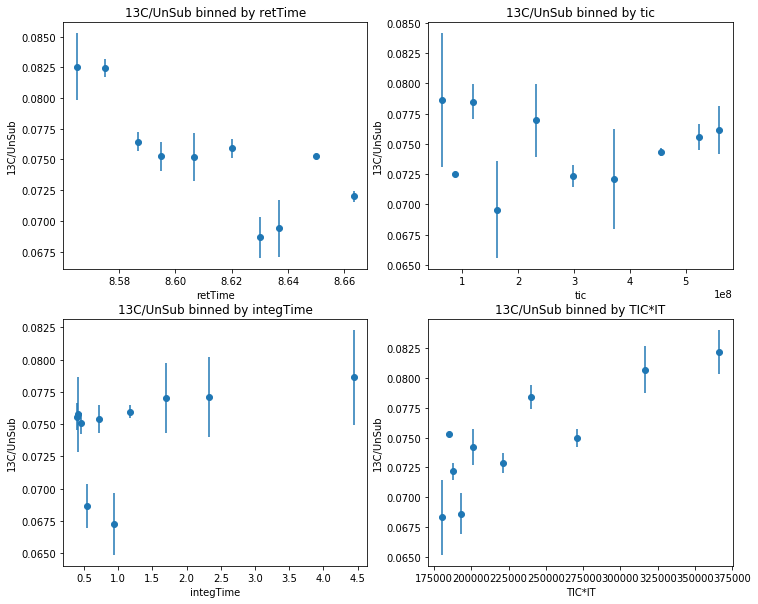

KeyError: 'UnSub/15N'

In [23]:
df = Merged[0]
numBins = 10    
xvars = ['retTime','tic','integTime','TIC*IT']
count = df.shape[0]/10

#N.B: I use the name specialIsotopeList to avoid overwriting the isotopeList variable the rest of the code uses. 
#One could avoid this by making this a separate function, but I mess with this code often enough (and it takes
#a while to import large excel sheets for many fragment measurements) so I leave it by itself here. This may be 
#a little confusing, and should be resolved whenever we figure out the best way to reduce variation based on 
#TIC*IT to a single number saying "good" or "bad", which is the ultimate goal. 

specialIsotopeList = ['13C','15N']
for isotope in specialIsotopeList:
    
    fig = plt.figure(figsize=(12,10))
    
    for variable in xvars:

        avgXList = []
        avgYList = []
        errorList = []

        for div in range(0,numBins):

            if isotope + '/UnSub' in df:
                targetVariable = isotope + '/UnSub'
            else:
                targetVariable = 'UnSub/' + isotope

            sortDf = df.sort_values(by=[variable])
            division = [int(div * count//1),int((div+1)*count//1)]
            restrictDf = sortDf.iloc[list(range(division[0],division[1]))]
            Ymean = np.mean(restrictDf[targetVariable])
            YStd = np.std(restrictDf[targetVariable])
            YStError = YStd / np.power(len(restrictDf),0.5)
            Xmean = np.mean(restrictDf[variable])

            avgXList.append(Xmean)
            avgYList.append(Ymean)
            errorList.append(YStError)

        plt.subplot(2,2,xvars.index(variable)+1)
        plt.errorbar(avgXList, avgYList, errorList, fmt='o')
        plt.xlabel(variable)
        plt.ylabel(targetVariable)
        plt.title(targetVariable + ' binned by ' + variable)

    plt.show()

Calculate and plot output for a single raw file. 
You may need to mess with the numCols, widthMultiple, and heightMultiple variables (increasing the latter two makes the figure wider or taller) to make the figure appear nice for different numbers of plots. 

In [24]:
output = calcRawFileOutput(Merged, gc_elution_on, isotopeList, omitRatios)
plotOutput(output,isotopeList = isotopeList,omitRatios = omitRatios,numCols = 3, widthMultiple = 5, heightMultiple = 4)
#todo: plot output

NameError: name '_calcRawFileOutput' is not defined